# Scripts to generate results plots for the manuscript

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/USC Random NN')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import Normalize
import seaborn as sns
from scipy import stats

In [ ]:
c_range = range(2,11)
cbar_ticks=range(2,11,2)
#orig_cm = sns.dark_palette("#69d", as_cmap=True)
orig_cm = sns.color_palette('Blues', as_cmap=True).reversed()
cm = colors.LinearSegmentedColormap.from_list('new_cmap', orig_cm(np.linspace(0.2, 0.6, 100)))
cc = c_range
norm = Normalize(vmin=min(cc), vmax=max(cc))
param_lims = ['1M', '10M']

#orig_cm_2 = sns.dark_palette("#eb616c", as_cmap=True)
orig_cm_2 = sns.color_palette("Reds", as_cmap=True).reversed()
cm_2 = colors.LinearSegmentedColormap.from_list('new_cmap', orig_cm_2(np.linspace(0.2, 0.6, 100)))

img_path = './drive/My Drive/Colab Notebooks/USC Random NN/images/'

# Plotting scripts

In [ ]:
def plot_main_experiment_mean_all(dense_1M, dense_10M, rand_dense_1M, rand_dense_10M, x_label='MLP', y_label='RandDense', climate_bench_points=None, pattern_scaling_points=None, save_path=None):
  fig, axes = plt.subplots(1,4, figsize=(28,7))
  vars_to_predict = ['TAS', 'DTR', 'PR', 'PR90']
        
  for j in range(len(vars_to_predict)):

    dense_means_1M = [np.mean(dense_1M[x][j]) for x in range(9)]
    dense_stds_1M = [stats.sem(dense_1M[x][j]) for x in range(9)]
    rand_dense_means_1M = [np.mean(rand_dense_1M[x][j]) for x in range(9)]
    rand_dense_stds_1M = [stats.sem(rand_dense_1M[x][j]) for x in range(9)]

    dense_means_10M = [np.mean(dense_10M[x][j]) for x in range(9)]
    dense_stds_10M = [stats.sem(dense_10M[x][j]) for x in range(9)]
    rand_dense_means_10M = [np.mean(rand_dense_10M[x][j]) for x in range(9)]
    rand_dense_stds_10M = [stats.sem(rand_dense_10M[x][j]) for x in range(9)]

    ax = axes[j]

    ax.errorbar(x=dense_means_1M, y=rand_dense_means_1M, xerr=dense_stds_1M, yerr=rand_dense_stds_1M, linestyle='None', ecolor=cm(norm(cc)), elinewidth=2.5)
    sns.scatterplot(ax=ax, x=dense_means_1M, y=rand_dense_means_1M, s=75, c=c_range, cmap=cm)

    ax.errorbar(x=dense_means_10M, y=rand_dense_means_10M, xerr=dense_stds_10M, yerr=rand_dense_stds_10M, linestyle='None', ecolor=cm_2(norm(cc)), elinewidth=2.5)
    sns.scatterplot(ax=ax, x=dense_means_10M, y=rand_dense_means_10M, s=75, c=c_range, cmap=cm_2)

    if climate_bench_points != None:
      ax.scatter(climate_bench_points[j], climate_bench_points[j], marker='*', s=250, c='black',)

    if pattern_scaling_points != None:
      ax.scatter(pattern_scaling_points[j], pattern_scaling_points[j], marker='s', s=50, c='black',)

    ax.autoscale(axis='x')
    ax.autoscale(axis='y')
    min_lim = min(ax.get_xlim()[0],ax.get_ylim()[0])
    max_lim = max(ax.get_xlim()[1],ax.get_ylim()[1])
    ax.set_xlim(min_lim, max_lim)
    ax.set_ylim(min_lim, max_lim)
    ax.set_aspect('equal', adjustable='box')

    ax.set_title(f'{vars_to_predict[j]}', loc='left')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.grid(which='major', linewidth=0.6)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_xticks())
    ax.grid(which='minor', linewidth=0.6, alpha=0.4)
    ax.minorticks_on()
    ax.tick_params(which='minor', bottom=False, left=False)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.plot([0, 2], [0, 2], color='black', transform=ax.transAxes)
    sns.despine()

  fig.subplots_adjust(right=0.83)
  cbar_ax = fig.add_axes([0.85, 0.20, 0.0075, 0.6])
  cbar = fig.colorbar(axes[0].collections[2], cax=cbar_ax, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar.ax.tick_params(color='white', direction='in', left=True)
  cbar.ax.set_xlabel('Layers', labelpad=10)
  cbar.ax.xaxis.set_label_position('bottom')
  cbar.ax.set_title('1M')

  fig.subplots_adjust(right=0.83)
  cbar_ax_2 = fig.add_axes([0.875, 0.20, 0.0075, 0.6])
  cbar_2 = fig.colorbar(axes[0].collections[5], cax=cbar_ax_2, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar_2.ax.tick_params(color='white', direction='in', left=True)
  cbar_2.ax.set_xlabel('Layers', labelpad=10)
  cbar_2.ax.xaxis.set_label_position('bottom')
  cbar_2.ax.set_title('10M')

  if save_path != None:
    fig.savefig(save_path, bbox_inches='tight')

def plot_main_experiment_best_all(dense_1M, dense_10M, rand_dense_1M, rand_dense_10M, x_label='MLP', y_label='RandDense', climate_bench_points=None, pattern_scaling_points=None, save_path=None):
  fig, axes = plt.subplots(1,4, figsize=(28,7))
  vars_to_predict = ['TAS', 'DTR', 'PR', 'PR90']
        
  for j in range(len(vars_to_predict)):

    dense_tops_1M = [min(dense_1M[x][j]) for x in range(9)]
    rand_dense_tops_1M = [min(rand_dense_1M[x][j]) for x in range(9)]

    dense_tops_10M = [min(dense_10M[x][j]) for x in range(9)]
    rand_dense_tops_10M = [min(rand_dense_10M[x][j]) for x in range(9)]

    ax = axes[j]

    sns.scatterplot(ax=ax, x=dense_tops_1M, y=rand_dense_tops_1M, s=75, c=c_range, cmap=cm)
    sns.scatterplot(ax=ax, x=dense_tops_10M, y=rand_dense_tops_10M, s=75, c=c_range, cmap=cm_2)

    if climate_bench_points != None:
      ax.scatter(climate_bench_points[j], climate_bench_points[j], marker='*', s=250, c='black',)

    if pattern_scaling_points != None:
      ax.scatter(pattern_scaling_points[j], pattern_scaling_points[j], marker='s', s=50, c='black',)

    ax.autoscale(axis='x')
    ax.autoscale(axis='y')
    min_lim = min(ax.get_xlim()[0],ax.get_ylim()[0])
    max_lim = max(ax.get_xlim()[1],ax.get_ylim()[1])
    ax.set_xlim(min_lim, max_lim)
    ax.set_ylim(min_lim, max_lim)
    ax.set_aspect('equal', adjustable='box')

    ax.set_title(f'{vars_to_predict[j]}', loc='left')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.grid(which='major', linewidth=0.6)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_xticks())
    ax.grid(which='minor', linewidth=0.6, alpha=0.4)
    ax.minorticks_on()
    ax.tick_params(which='minor', bottom=False, left=False)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.plot([0, 2], [0, 2], color='black', transform=ax.transAxes)
    sns.despine()

  fig.subplots_adjust(right=0.83)
  cbar_ax = fig.add_axes([0.85, 0.20, 0.0075, 0.6])
  cbar = fig.colorbar(axes[0].collections[0], cax=cbar_ax, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar.ax.tick_params(color='white', direction='in', left=True)
  cbar.ax.set_xlabel('Layers', labelpad=10)
  cbar.ax.xaxis.set_label_position('bottom')
  cbar.ax.set_title('1M')

  fig.subplots_adjust(right=0.83)
  cbar_ax_2 = fig.add_axes([0.875, 0.20, 0.0075, 0.6])
  cbar_2 = fig.colorbar(axes[0].collections[1], cax=cbar_ax_2, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar_2.ax.tick_params(color='white', direction='in', left=True)
  cbar_2.ax.set_xlabel('Layers', labelpad=10)
  cbar_2.ax.xaxis.set_label_position('bottom')
  cbar_2.ax.set_title('10M')

  if save_path != None:
    fig.savefig(save_path, bbox_inches='tight')

In [ ]:
def plot_main_experiment_mean_all_2x2(dense_1M, dense_10M, rand_dense_1M, rand_dense_10M, x_label='MLP', y_label='RandDense', climate_bench_points=None, pattern_scaling_points=None, save_path=None):
  fig, axes = plt.subplots(2,2, figsize=(12,12))
  vars_to_predict = ['TAS', 'DTR', 'PR', 'PR90']
        
  for j in range(len(vars_to_predict)):

    dense_means_1M = [np.mean(dense_1M[x][j]) for x in range(9)]
    dense_stds_1M = [stats.sem(dense_1M[x][j]) for x in range(9)]
    rand_dense_means_1M = [np.mean(rand_dense_1M[x][j]) for x in range(9)]
    rand_dense_stds_1M = [stats.sem(rand_dense_1M[x][j]) for x in range(9)]

    dense_means_10M = [np.mean(dense_10M[x][j]) for x in range(9)]
    dense_stds_10M = [stats.sem(dense_10M[x][j]) for x in range(9)]
    rand_dense_means_10M = [np.mean(rand_dense_10M[x][j]) for x in range(9)]
    rand_dense_stds_10M = [stats.sem(rand_dense_10M[x][j]) for x in range(9)]

    ax = axes[j//2, j%2]

    ax.errorbar(x=dense_means_1M, y=rand_dense_means_1M, xerr=dense_stds_1M, yerr=rand_dense_stds_1M, linestyle='None', ecolor=cm(norm(cc)), elinewidth=2.5)
    sns.scatterplot(ax=ax, x=dense_means_1M, y=rand_dense_means_1M, s=75, c=c_range, cmap=cm)

    ax.errorbar(x=dense_means_10M, y=rand_dense_means_10M, xerr=dense_stds_10M, yerr=rand_dense_stds_10M, linestyle='None', ecolor=cm_2(norm(cc)), elinewidth=2.5)
    sns.scatterplot(ax=ax, x=dense_means_10M, y=rand_dense_means_10M, s=75, c=c_range, cmap=cm_2)

    if climate_bench_points != None:
      ax.scatter(climate_bench_points[j], climate_bench_points[j], marker='*', s=250, c='black',)

    if pattern_scaling_points != None:
      ax.scatter(pattern_scaling_points[j], pattern_scaling_points[j], marker='s', s=50, c='black',)

    ax.autoscale(axis='x')
    ax.autoscale(axis='y')
    min_lim = min(ax.get_xlim()[0],ax.get_ylim()[0])
    max_lim = max(ax.get_xlim()[1],ax.get_ylim()[1])
    ax.set_xlim(min_lim, max_lim)
    ax.set_ylim(min_lim, max_lim)
    ax.set_aspect('equal', adjustable='box')

    ax.set_title(f'{vars_to_predict[j]}', loc='left')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.grid(which='major', linewidth=0.6)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_xticks())
    ax.grid(which='minor', linewidth=0.6, alpha=0.4)
    ax.minorticks_on()
    ax.tick_params(which='minor', bottom=False, left=False)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.plot([0, 2], [0, 2], color='black', transform=ax.transAxes)
    sns.despine()

  fig.subplots_adjust(right=0.83)
  cbar_ax = fig.add_axes([0.85, 0.20, 0.02, 0.6])
  cbar = fig.colorbar(axes[0,0].collections[2], cax=cbar_ax, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar.ax.tick_params(color='white', direction='in', left=True)
  cbar.ax.set_xlabel('Layers', labelpad=10)
  cbar.ax.xaxis.set_label_position('bottom')
  cbar.ax.set_title('1M')

  fig.subplots_adjust(right=0.83)
  cbar_ax_2 = fig.add_axes([0.9, 0.20, 0.02, 0.6])
  cbar_2 = fig.colorbar(axes[0,0].collections[5], cax=cbar_ax_2, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar_2.ax.tick_params(color='white', direction='in', left=True)
  cbar_2.ax.set_xlabel('Layers', labelpad=10)
  cbar_2.ax.xaxis.set_label_position('bottom')
  cbar_2.ax.set_title('10M')

  if save_path != None:
    fig.savefig(save_path, bbox_inches='tight')

def plot_main_experiment_best_all_2x2(dense_1M, dense_10M, rand_dense_1M, rand_dense_10M, x_label='MLP', y_label='RandDense', climate_bench_points=None, pattern_scaling_points=None, save_path=None):
  fig, axes = plt.subplots(2,2, figsize=(12,12))
  vars_to_predict = ['TAS', 'DTR', 'PR', 'PR90']
        
  for j in range(len(vars_to_predict)):

    dense_tops_1M = [min(dense_1M[x][j]) for x in range(9)]
    rand_dense_tops_1M = [min(rand_dense_1M[x][j]) for x in range(9)]

    dense_tops_10M = [min(dense_10M[x][j]) for x in range(9)]
    rand_dense_tops_10M = [min(rand_dense_10M[x][j]) for x in range(9)]

    ax = axes[j//2, j%2]

    sns.scatterplot(ax=ax, x=dense_tops_1M, y=rand_dense_tops_1M, s=75, c=c_range, cmap=cm)
    sns.scatterplot(ax=ax, x=dense_tops_10M, y=rand_dense_tops_10M, s=75, c=c_range, cmap=cm_2)

    if climate_bench_points != None:
      ax.scatter(climate_bench_points[j], climate_bench_points[j], marker='*', s=250, c='black',)

    if pattern_scaling_points != None:
      ax.scatter(pattern_scaling_points[j], pattern_scaling_points[j], marker='s', s=50, c='black',)

    ax.autoscale(axis='x')
    ax.autoscale(axis='y')
    min_lim = min(ax.get_xlim()[0],ax.get_ylim()[0])
    max_lim = max(ax.get_xlim()[1],ax.get_ylim()[1])
    ax.set_xlim(min_lim, max_lim)
    ax.set_ylim(min_lim, max_lim)
    ax.set_aspect('equal', adjustable='box')

    ax.set_title(f'{vars_to_predict[j]}', loc='left')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.grid(which='major', linewidth=0.6)
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_xticks())
    ax.grid(which='minor', linewidth=0.6, alpha=0.4)
    ax.minorticks_on()
    ax.tick_params(which='minor', bottom=False, left=False)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.plot([0, 2], [0, 2], color='black', transform=ax.transAxes)
    sns.despine()

  fig.subplots_adjust(right=0.83)
  cbar_ax = fig.add_axes([0.85, 0.20, 0.02, 0.6])
  cbar = fig.colorbar(axes[0,0].collections[0], cax=cbar_ax, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar.ax.tick_params(color='white', direction='in', left=True)
  cbar.ax.set_xlabel('Layers', labelpad=10)
  cbar.ax.xaxis.set_label_position('bottom')
  cbar.ax.set_title('1M')

  fig.subplots_adjust(right=0.83)
  cbar_ax_2 = fig.add_axes([0.9, 0.20, 0.02, 0.6])
  cbar_2 = fig.colorbar(axes[0,0].collections[1], cax=cbar_ax_2, ticks=cbar_ticks, shrink=0.1, aspect=100)
  cbar_2.ax.tick_params(color='white', direction='in', left=True)
  cbar_2.ax.set_xlabel('Layers', labelpad=10)
  cbar_2.ax.xaxis.set_label_position('bottom')
  cbar_2.ax.set_title('10M')

  if save_path != None:
    fig.savefig(save_path, bbox_inches='tight')

# New ClimateBench Metrics Analysis
See Section 5 of the manuscript

In [ ]:
# Load all raw experimental results
dense_1M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/dense/new_metrics_experiment/1M/rmse_data_spatial.npy')
dense_1M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/dense/new_metrics_experiment/1M/rmse_data_global.npy')
dense_1M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/dense/new_metrics_experiment/1M/rmse_data_total.npy')

dense_10M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/dense/new_metrics_experiment/10M/rmse_data_spatial.npy')
dense_10M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/dense/new_metrics_experiment/10M/rmse_data_global.npy')
dense_10M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/dense/new_metrics_experiment/10M/rmse_data_total.npy')

rand_dense_1M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/new_metrics_experiment/1M/rmse_data_spatial.npy')
rand_dense_1M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/new_metrics_experiment/1M/rmse_data_global.npy')
rand_dense_1M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/new_metrics_experiment/1M/rmse_data_total.npy')

rand_dense_10M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/new_metrics_experiment/10M/rmse_data_spatial.npy')
rand_dense_10M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/new_metrics_experiment/10M/rmse_data_global.npy')
rand_dense_10M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/new_metrics_experiment/10M/rmse_data_total.npy')

cnn_1M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn/new_metrics_experiment/1M/rmse_data_spatial.npy')
cnn_1M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn/new_metrics_experiment/1M/rmse_data_global.npy')
cnn_1M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn/new_metrics_experiment/1M/rmse_data_total.npy')

cnn_10M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn/new_metrics_experiment/10M/rmse_data_spatial.npy')
cnn_10M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn/new_metrics_experiment/10M/rmse_data_global.npy')
cnn_10M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn/new_metrics_experiment/10M/rmse_data_total.npy')

cnn_rand_dense_1M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/new_metrics_experiment/1M/rmse_data_spatial.npy')
cnn_rand_dense_1M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/new_metrics_experiment/1M/rmse_data_global.npy')
cnn_rand_dense_1M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/new_metrics_experiment/1M/rmse_data_total.npy')

cnn_rand_dense_10M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/new_metrics_experiment/10M/rmse_data_spatial.npy')
cnn_rand_dense_10M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/new_metrics_experiment/10M/rmse_data_global.npy')
cnn_rand_dense_10M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/new_metrics_experiment/10M/rmse_data_total.npy')

cnn_lstm_1M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm/new_metrics_experiment/1M/rmse_data_spatial.npy')
cnn_lstm_1M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm/new_metrics_experiment/1M/rmse_data_global.npy')
cnn_lstm_1M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm/new_metrics_experiment/1M/rmse_data_total.npy')

cnn_lstm_10M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm/new_metrics_experiment/10M/rmse_data_spatial.npy')
cnn_lstm_10M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm/new_metrics_experiment/10M/rmse_data_global.npy')
cnn_lstm_10M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm/new_metrics_experiment/10M/rmse_data_total.npy')

cnn_lstm_rand_dense_1M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/new_metrics_experiment/1M/rmse_data_spatial.npy')
cnn_lstm_rand_dense_1M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/new_metrics_experiment/1M/rmse_data_global.npy')
cnn_lstm_rand_dense_1M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/new_metrics_experiment/1M/rmse_data_total.npy')

cnn_lstm_rand_dense_10M_spatial = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/new_metrics_experiment/10M/rmse_data_spatial.npy')
cnn_lstm_rand_dense_10M_global = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/new_metrics_experiment/10M/rmse_data_global.npy')
cnn_lstm_rand_dense_10M_total = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/new_metrics_experiment/10M/rmse_data_total.npy')

rand_dense_1M_total_relu = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/node_op_experiments/relu_position/1M/rmse_data_total.npy')
rand_dense_10M_total_relu = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/node_op_experiments/relu_position/10M/rmse_data_total.npy')
rand_dense_1M_total_sum = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/node_op_experiments/weighted_sum/1M/rmse_data_total.npy')
rand_dense_10M_total_sum = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/node_op_experiments/weighted_sum/10M/rmse_data_total.npy')

cnn_rand_dense_1M_total_relu = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/node_op_experiments/relu_position/1M/rmse_data_total.npy')
cnn_rand_dense_10M_total_relu = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/node_op_experiments/relu_position/10M/rmse_data_total.npy')
cnn_rand_dense_1M_total_sum = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/node_op_experiments/weighted_sum/1M/rmse_data_total.npy')
cnn_rand_dense_10M_total_sum = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/node_op_experiments/weighted_sum/10M/rmse_data_total.npy')

cnn_lstm_rand_dense_1M_total_relu = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/node_op_experiments/relu_position/1M/rmse_data_total.npy')
cnn_lstm_rand_dense_10M_total_relu = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/node_op_experiments/relu_position/10M/rmse_data_total.npy')
cnn_lstm_rand_dense_1M_total_sum = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/node_op_experiments/weighted_sum/1M/rmse_data_total.npy')
cnn_lstm_rand_dense_10M_total_sum = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/node_op_experiments/weighted_sum/10M/rmse_data_total.npy')

## MLP vs. RandDense

In [ ]:
#plot_main_experiment_mean_all(dense_1M_spatial, dense_10M_spatial, rand_dense_1M_spatial, rand_dense_10M_spatial, x_label='MLP', y_label='RandDense',)

In [ ]:
#plot_main_experiment_mean_all(dense_1M_global, dense_10M_global, rand_dense_1M_global, rand_dense_10M_global, x_label='MLP', y_label='RandDense',)

In [ ]:
#plot_main_experiment_mean_all(dense_1M_total, dense_10M_total, rand_dense_1M_total, rand_dense_10M_total, x_label='MLP', y_label='RandDense',)

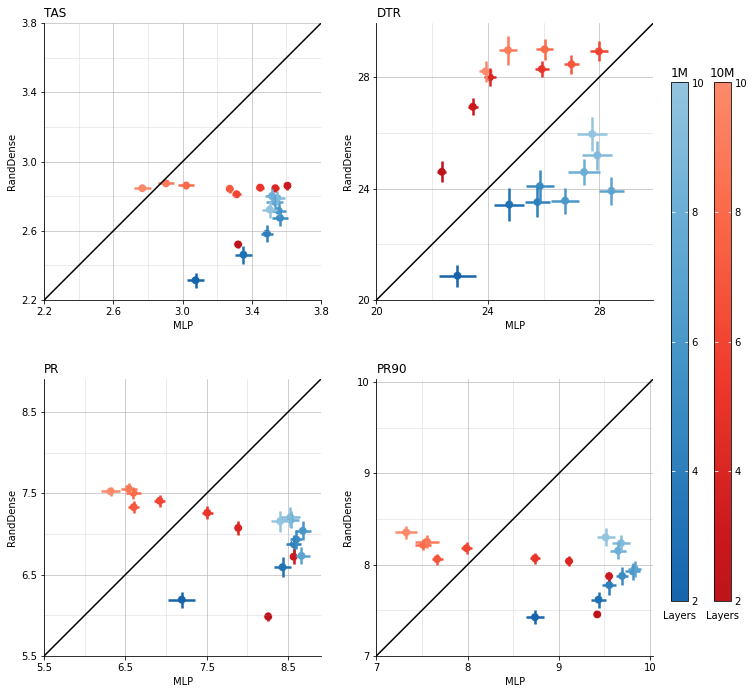

In [ ]:
plot_main_experiment_mean_all_2x2(dense_1M_total, dense_10M_total, rand_dense_1M_total, rand_dense_10M_total, x_label='MLP', y_label='RandDense',
                                  save_path=img_path+'mlp_total_rmse_mean.pdf')

In [ ]:
#plot_main_experiment_best_all(dense_1M_spatial, dense_10M_spatial, rand_dense_1M_spatial, rand_dense_10M_spatial, x_label='MLP', y_label='RandDense',)

In [ ]:
#plot_main_experiment_best_all(dense_1M_global, dense_10M_global, rand_dense_1M_global, rand_dense_10M_global, x_label='MLP', y_label='RandDense',)

In [ ]:
#plot_main_experiment_best_all(dense_1M_total, dense_10M_total, rand_dense_1M_total, rand_dense_10M_total, x_label='MLP', y_label='RandDense',)

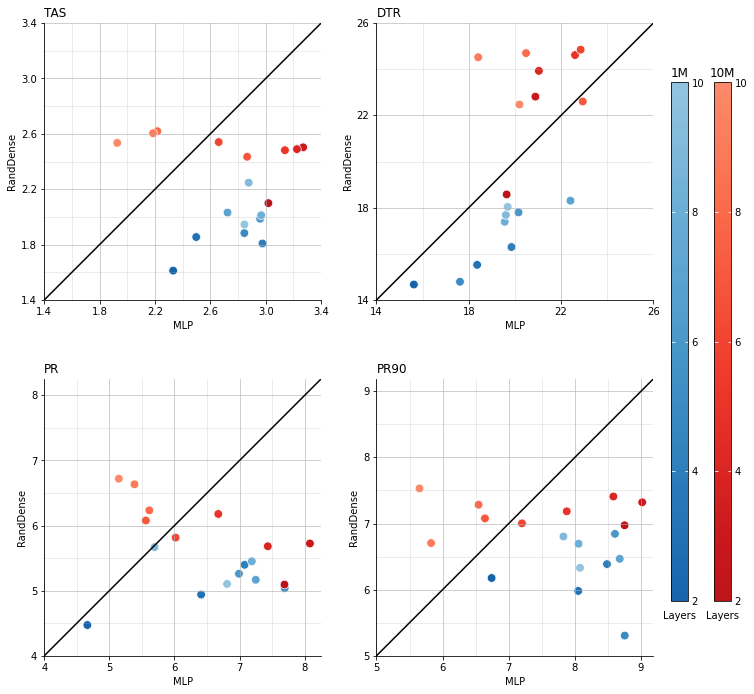

In [ ]:
plot_main_experiment_best_all_2x2(dense_1M_total, dense_10M_total, rand_dense_1M_total, rand_dense_10M_total, x_label='MLP', y_label='RandDense',
                                  save_path=img_path+'mlp_total_rmse_best.pdf')

## CNN vs. CNN RandDense

In [ ]:
#plot_main_experiment_mean_all(cnn_1M_spatial, cnn_10M_spatial, cnn_rand_dense_1M_spatial, cnn_rand_dense_10M_spatial, x_label='CNN', y_label='CNN RandDense',)

In [ ]:
#plot_main_experiment_mean_all(cnn_1M_global, cnn_10M_global, cnn_rand_dense_1M_global, cnn_rand_dense_10M_global, x_label='CNN', y_label='CNN RandDense',)

In [ ]:
#plot_main_experiment_mean_all(cnn_1M_total, cnn_10M_total, cnn_rand_dense_1M_total, cnn_rand_dense_10M_total, x_label='CNN', y_label='CNN RandDense',)

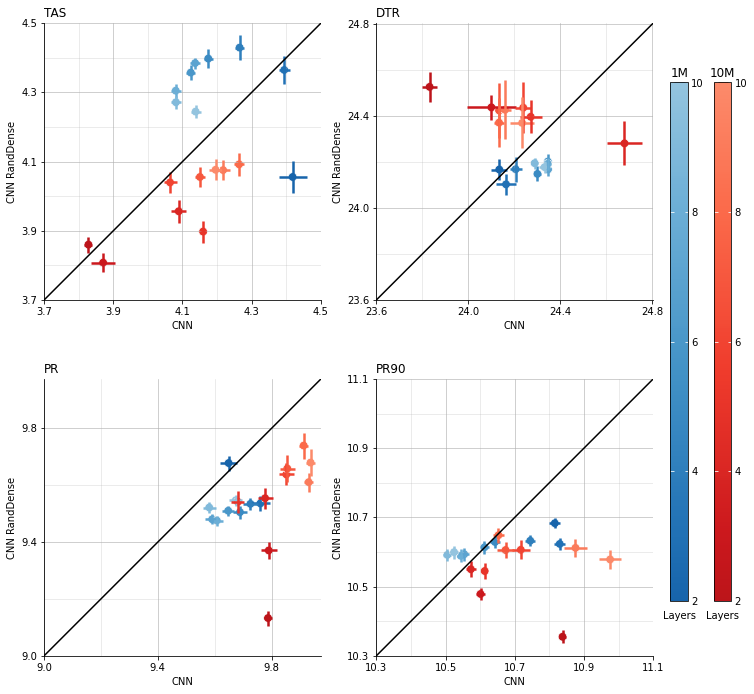

In [ ]:
plot_main_experiment_mean_all_2x2(cnn_1M_total, cnn_10M_total, cnn_rand_dense_1M_total, cnn_rand_dense_10M_total, x_label='CNN', y_label='CNN RandDense',
                                  save_path=img_path+'cnn_total_rmse_mean.pdf')

In [ ]:
#plot_main_experiment_best_all(cnn_1M_spatial, cnn_10M_spatial, cnn_rand_dense_1M_spatial, cnn_rand_dense_10M_spatial, x_label='CNN', y_label='CNN RandDense',)

In [ ]:
#plot_main_experiment_best_all(cnn_1M_global, cnn_10M_global, cnn_rand_dense_1M_global, cnn_rand_dense_10M_global, x_label='CNN', y_label='CNN RandDense',)

In [ ]:
#plot_main_experiment_best_all(cnn_1M_total, cnn_10M_total, cnn_rand_dense_1M_total, cnn_rand_dense_10M_total, x_label='CNN', y_label='CNN RandDense',)

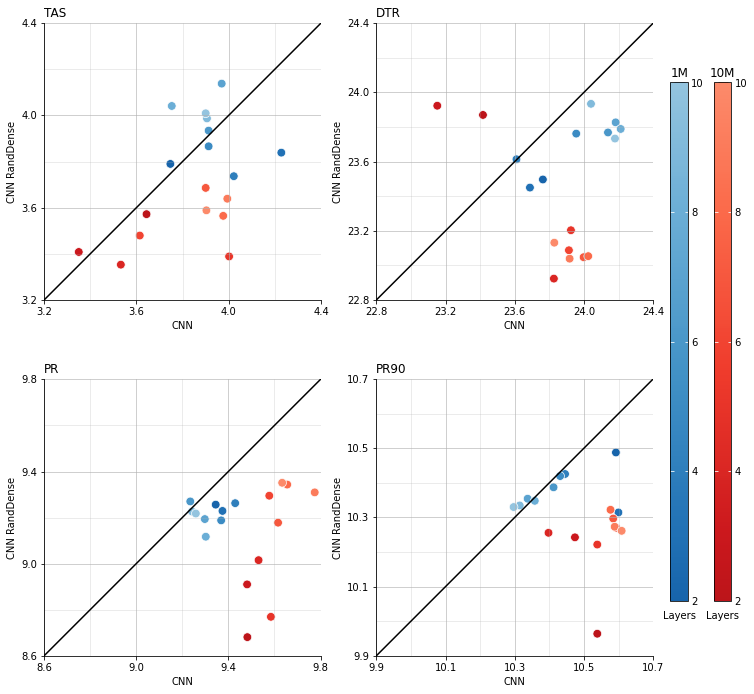

In [ ]:
plot_main_experiment_best_all_2x2(cnn_1M_total, cnn_10M_total, cnn_rand_dense_1M_total, cnn_rand_dense_10M_total, x_label='CNN', y_label='CNN RandDense',
                                  save_path=img_path+'cnn_total_rmse_best.pdf')

## CNN-LSTM vs. CNN-LSTM RandDense

In [ ]:
'''
plot_main_experiment_mean_all(cnn_lstm_1M_spatial, cnn_lstm_10M_spatial, cnn_lstm_rand_dense_1M_spatial, cnn_lstm_rand_dense_10M_spatial,
                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                              climate_bench_points=[0.108,0.155,2.209,2.609],
                              pattern_scaling_points=[0.08,0.166,2.022,2.418],)
'''

"\nplot_main_experiment_mean_all(cnn_lstm_1M_spatial, cnn_lstm_10M_spatial, cnn_lstm_rand_dense_1M_spatial, cnn_lstm_rand_dense_10M_spatial,\n                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',\n                              climate_bench_points=[0.108,0.155,2.209,2.609],\n                              pattern_scaling_points=[0.08,0.166,2.022,2.418],)\n"

In [ ]:
'''
plot_main_experiment_mean_all(cnn_lstm_1M_global, cnn_lstm_10M_global, cnn_lstm_rand_dense_1M_global, cnn_lstm_rand_dense_10M_global,
                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                              climate_bench_points=[0.043,0.033,0.206,0.345],
                              pattern_scaling_points=[0.048,0.08,0.333,0.415],)
'''

"\nplot_main_experiment_mean_all(cnn_lstm_1M_global, cnn_lstm_10M_global, cnn_lstm_rand_dense_1M_global, cnn_lstm_rand_dense_10M_global,\n                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',\n                              climate_bench_points=[0.043,0.033,0.206,0.345],\n                              pattern_scaling_points=[0.048,0.08,0.333,0.415],)\n"

In [ ]:
'''
plot_main_experiment_mean_all(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total, cnn_lstm_rand_dense_10M_total,
                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                              climate_bench_points=[0.323, 0.322, 3.242, 4.334],
                              pattern_scaling_points=[0.322,0.564,3.688,4.493],)
'''

"\nplot_main_experiment_mean_all(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total, cnn_lstm_rand_dense_10M_total,\n                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',\n                              climate_bench_points=[0.323, 0.322, 3.242, 4.334],\n                              pattern_scaling_points=[0.322,0.564,3.688,4.493],)\n"

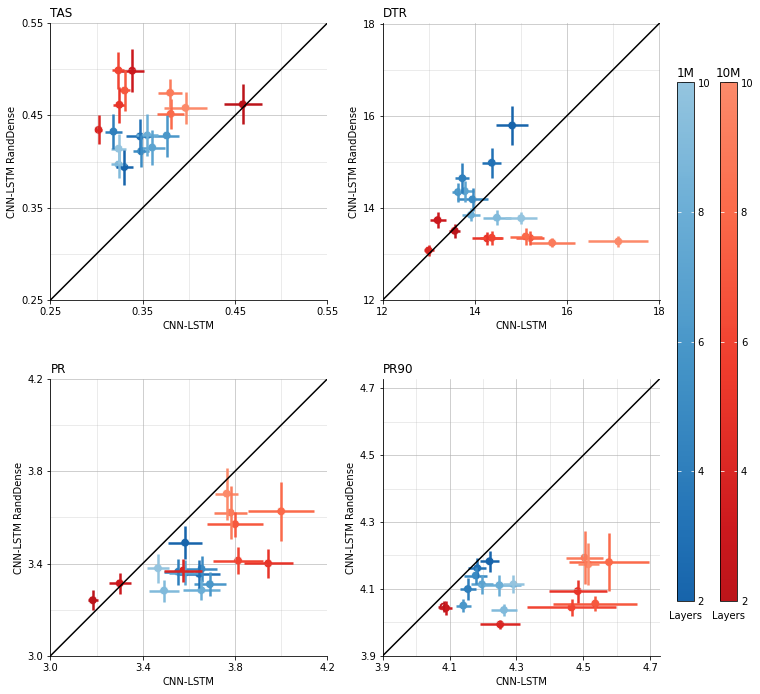

In [ ]:
plot_main_experiment_mean_all_2x2(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total, cnn_lstm_rand_dense_10M_total,
                                  x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                                  #climate_bench_points=[0.323, 0.322, 3.242, 4.334],
                                  #pattern_scaling_points=[0.322,0.564,3.688,4.493],
                                  save_path=img_path+'cnn_lstm_total_rmse_mean.pdf')

In [ ]:
'''
plot_main_experiment_best_all(cnn_lstm_1M_spatial, cnn_lstm_10M_spatial, cnn_lstm_rand_dense_1M_spatial, cnn_lstm_rand_dense_10M_spatial,
                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                              climate_bench_points=[0.108,0.155,2.209,2.609],
                              pattern_scaling_points=[0.08,0.166,2.022,2.418],)
'''

"\nplot_main_experiment_top1_all(cnn_lstm_1M_spatial, cnn_lstm_10M_spatial, cnn_lstm_rand_dense_1M_spatial, cnn_lstm_rand_dense_10M_spatial,\n                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',\n                              climate_bench_points=[0.108,0.155,2.209,2.609],\n                              pattern_scaling_points=[0.08,0.166,2.022,2.418],)\n"

In [ ]:
'''
plot_main_experiment_best_all(cnn_lstm_1M_global, cnn_lstm_10M_global, cnn_lstm_rand_dense_1M_global, cnn_lstm_rand_dense_10M_global,
                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                              climate_bench_points=[0.043,0.033,0.206,0.345],
                              pattern_scaling_points=[0.048,0.08,0.333,0.415],)
'''

"\nplot_main_experiment_top1_all(cnn_lstm_1M_global, cnn_lstm_10M_global, cnn_lstm_rand_dense_1M_global, cnn_lstm_rand_dense_10M_global,\n                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',\n                              climate_bench_points=[0.043,0.033,0.206,0.345],\n                              pattern_scaling_points=[0.048,0.08,0.333,0.415],)\n"

In [ ]:
'''
plot_main_experiment_best_all(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total, cnn_lstm_rand_dense_10M_total,
                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                              climate_bench_points=[0.323, 0.322, 3.242, 4.334],
                              pattern_scaling_points=[0.322,0.564,3.688,4.493],)
'''

"\nplot_main_experiment_top1_all(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total, cnn_lstm_rand_dense_10M_total,\n                              x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',\n                              climate_bench_points=[0.323, 0.322, 3.242, 4.334],\n                              pattern_scaling_points=[0.322,0.564,3.688,4.493],)\n"

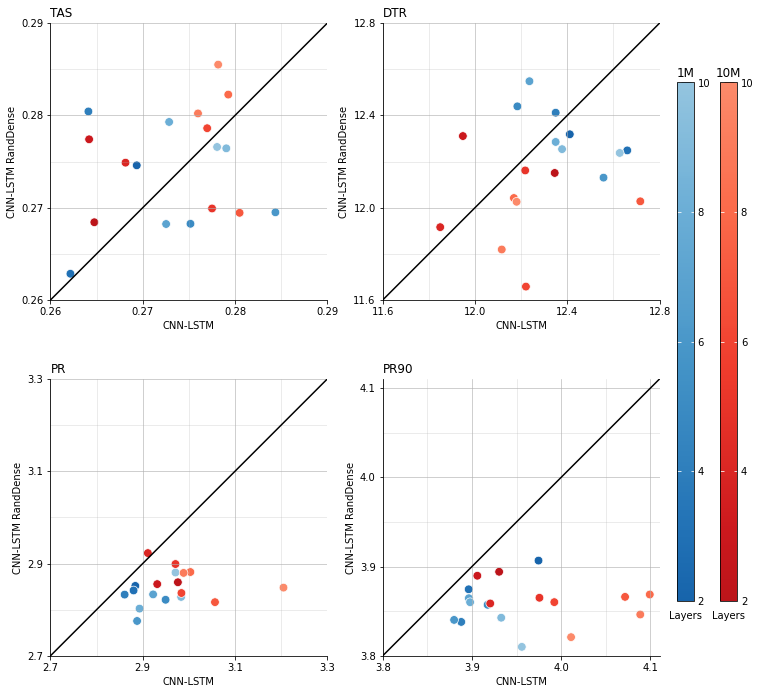

In [ ]:
plot_main_experiment_best_all_2x2(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total, cnn_lstm_rand_dense_10M_total,
                                  x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',
                                  #climate_bench_points=[0.323, 0.322, 3.242, 4.334],
                                  #pattern_scaling_points=[0.322,0.564,3.688,4.493],
                                  save_path=img_path+'cnn_lstm_total_rmse_best.pdf')

# Node Operation Experiments
See Section 6b of the manuscript

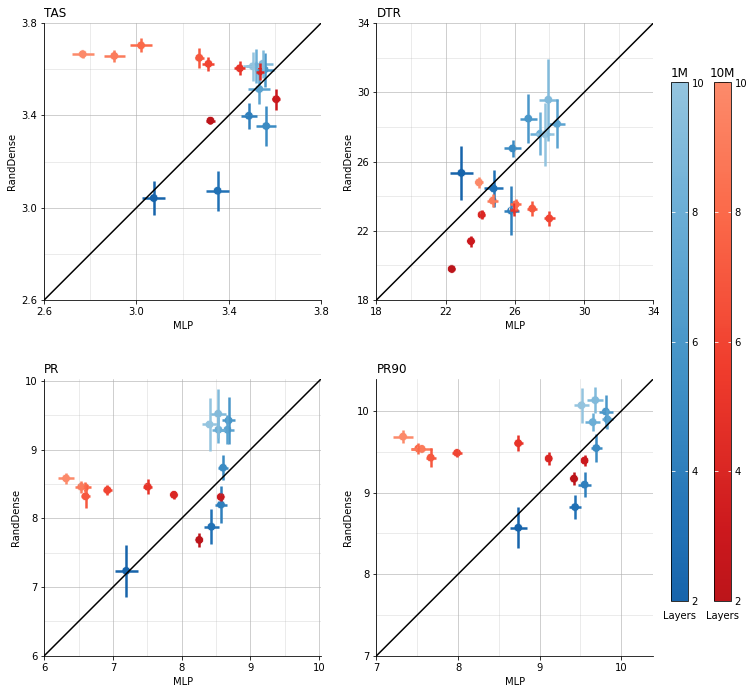

In [ ]:
plot_main_experiment_mean_all_2x2(dense_1M_total, dense_10M_total, rand_dense_1M_total_relu, rand_dense_10M_total_relu, x_label='MLP', y_label='RandDense',)

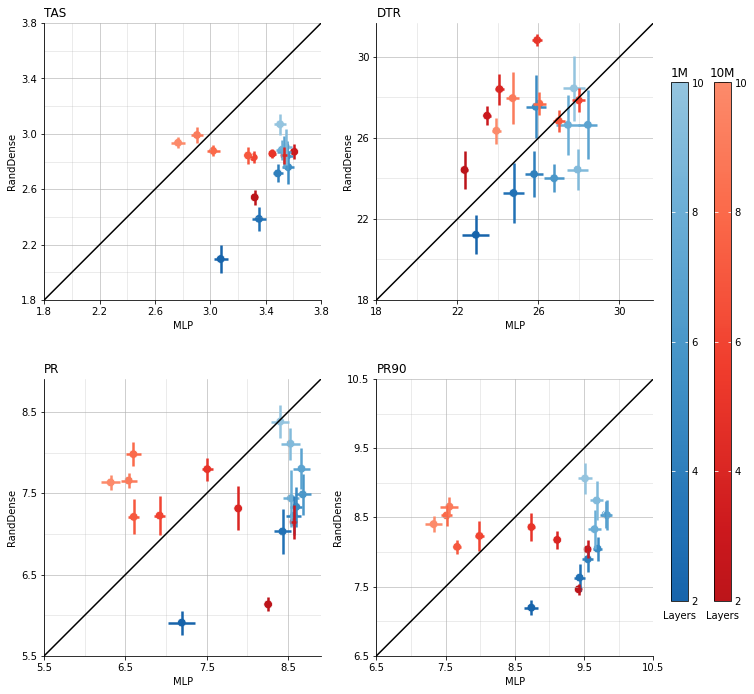

In [ ]:
plot_main_experiment_mean_all_2x2(dense_1M_total, dense_10M_total, rand_dense_1M_total_sum, rand_dense_10M_total_sum, x_label='MLP', y_label='RandDense',)

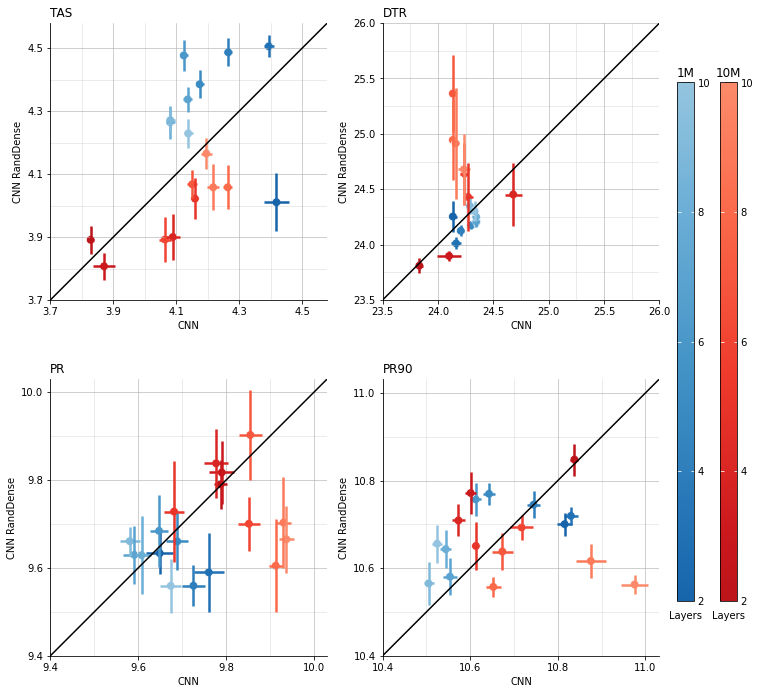

In [ ]:
plot_main_experiment_mean_all_2x2(cnn_1M_total, cnn_10M_total, cnn_rand_dense_1M_total_relu, cnn_rand_dense_10M_total_relu, x_label='CNN', y_label='CNN RandDense',)

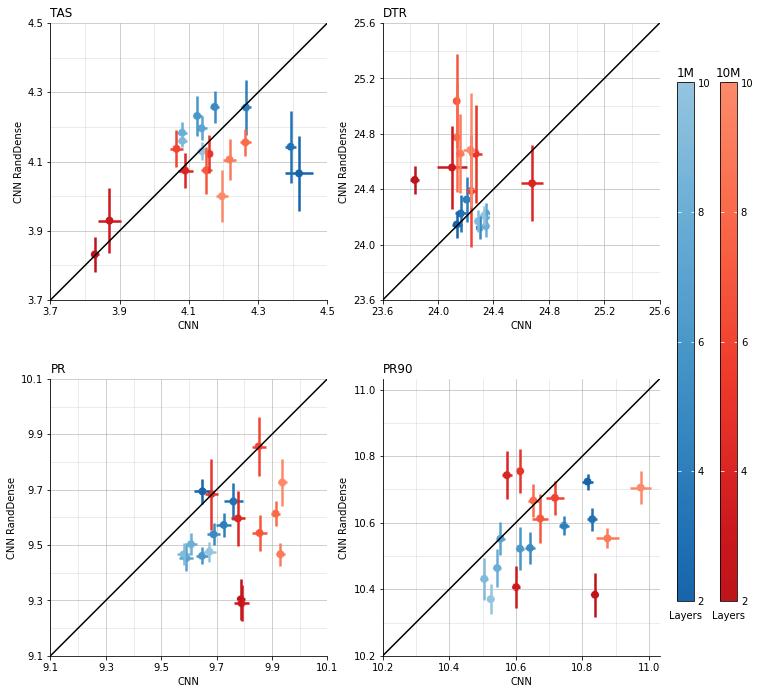

In [ ]:
plot_main_experiment_mean_all_2x2(cnn_1M_total, cnn_10M_total, cnn_rand_dense_1M_total_sum, cnn_rand_dense_10M_total_sum, x_label='CNN', y_label='CNN RandDense',)

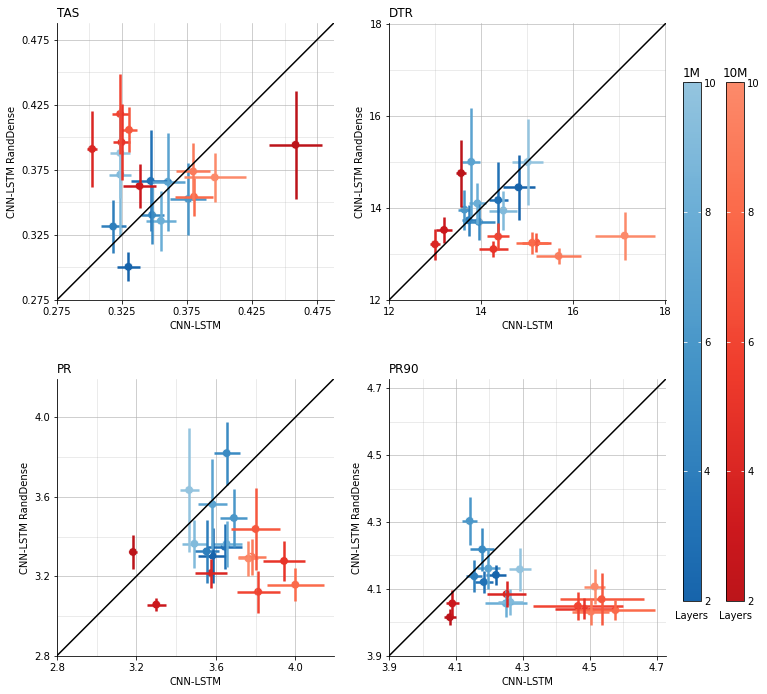

In [ ]:
plot_main_experiment_mean_all_2x2(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total_relu, cnn_lstm_rand_dense_10M_total_relu,
                                  x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',)

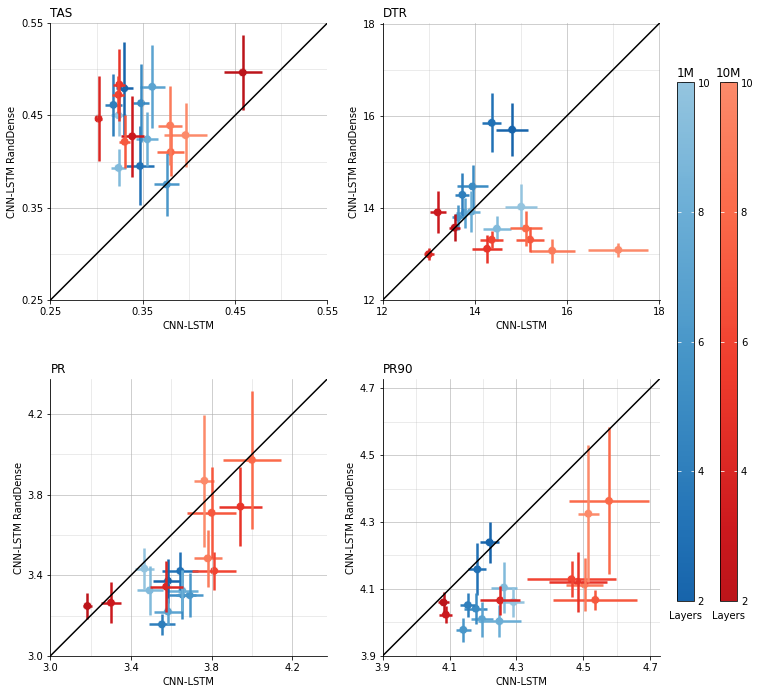

In [ ]:
plot_main_experiment_mean_all_2x2(cnn_lstm_1M_total, cnn_lstm_10M_total, cnn_lstm_rand_dense_1M_total_sum, cnn_lstm_rand_dense_10M_total_sum,
                                  x_label='CNN-LSTM', y_label='CNN-LSTM RandDense',)